In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rotation_range=45,
                            validation_split=0.2)
trainData = datagen.flow_from_directory(directory='lung_train',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='training',
                                        color_mode='rgb')
valData = datagen.flow_from_directory(directory='lung_test',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='validation',
                                        color_mode='rgb')

Found 10800 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))

for layer in vgg16.layers:
    layer.trainable = False

vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 14,739,267
Trainable params: 24,579
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
checkpoint = ModelCheckpoint(filepath='lungCancer_VGG16.hdf5', monitor='val_accuracy', save_best_only=True)
history = model.fit_generator(generator=trainData, epochs=20, verbose=1, validation_data=valData, callbacks=[checkpoint])

C:\Users\raami\AppData\Local\Temp\ipykernel_200976\3663295183.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=trainData, epochs=3, verbose=1, validation_data=valData, callbacks=[checkpoint])


Epoch 1/3
338/338 [==============================] - 84s 235ms/step - loss: 0.4890 - accuracy: 0.8164 - val_loss: 0.2874 - val_accuracy: 0.8933
Epoch 2/3
338/338 [==============================] - 78s 230ms/step - loss: 0.1983 - accuracy: 0.9257 - val_loss: 0.1942 - val_accuracy: 0.9133
Epoch 3/3
338/338 [==============================] - 79s 233ms/step - loss: 0.1755 - accuracy: 0.9381 - val_loss: 0.2113 - val_accuracy: 0.9067


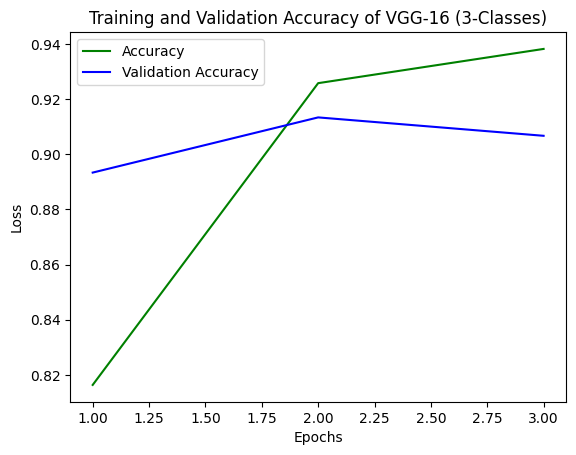

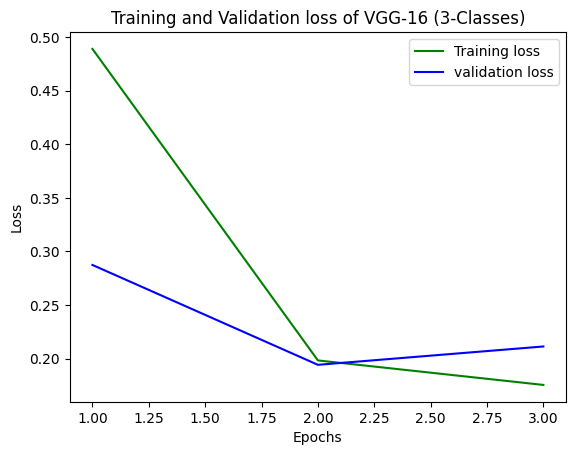

In [6]:
# Training and Validation Accuracy Graph of VGG-16 (3-Classes)
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,4)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG-16 (3-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Custom Convolutional Neural Network (3-Classes)
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,4)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of VGG-16 (3-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()